In [136]:
#importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
#reading files
miles_driven = pd.read_csv("D:\\MiniProject\\miles-driven.csv",sep = "|")
road_accidents = pd.read_csv("D:\\MiniProject\\road-accidents.csv",sep = "|",comment = "#")

In [138]:
miles_driven.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [139]:
road_accidents.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [140]:
#Create a textual and a graphical summary of the data
stats = road_accidents.describe()
stats

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


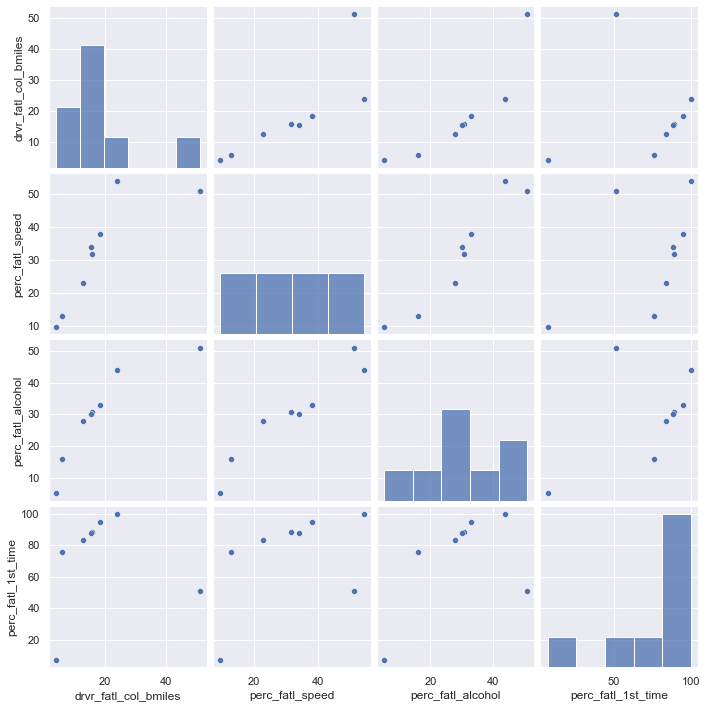

In [141]:
sns.set(font_scale = 1)
sns.pairplot(stats)

In [143]:
#Quantify the association of features and accidents
#Applying corr formulae
road_accidents.corr()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


In [144]:
#Fit a multivariate linear regression
from sklearn.linear_model import LinearRegression

In [145]:
x = road_accidents[['perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time']]
y = road_accidents[['drvr_fatl_col_bmiles']]

In [146]:
model = LinearRegression()

In [147]:
model.fit(x,y)

LinearRegression()

In [148]:
model.coef_

array([[-0.04180041,  0.19086404,  0.02473301]])

In [149]:
model.intercept_

array([9.06498048])

In [150]:
#Standardizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [151]:
x_scaled

array([[ 0.76264511, -0.1350496 , -1.26611685],
       [ 0.97232113, -1.1189824 ,  0.76536053],
       [ 0.34329308, -0.52862272,  1.05557158],
       [-1.43895304, -0.92219584,  0.91046605],
       [ 0.34329308, -0.52862272,  0.03983289],
       [ 0.5529691 , -0.52862272,  0.91046605],
       [ 1.49651116,  1.04566976, -0.9759058 ],
       [ 0.6578071 , -0.1350496 ,  1.49088816],
       [ 0.23845508, -0.72540928,  1.63599369],
       [-1.12443902, -0.33183616,  0.76536053],
       [-1.33411503, -1.1189824 ,  0.620255  ],
       [ 2.33521522,  2.02960256, -0.25037816],
       [ 0.44813109, -0.33183616,  1.34578263],
       [ 0.44813109,  0.65209664,  1.05557158],
       [-0.70508699, -0.33183616,  0.91046605],
       [-1.54379105, -1.1189824 , -0.25037816],
       [-0.49541097, -1.31576896, -0.54058922],
       [-1.33411503, -1.51255552, -1.84653896],
       [ 0.34329308,  0.45531008,  1.34578263],
       [ 0.6578071 , -0.1350496 , -0.68569475],
       [ 0.23845508,  0.25852352,  1.490

In [152]:
#Perform PCA on standardized data
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x_scaled)
x_pca

array([[ 0.88463912,  0.46421102,  1.09765186],
       [-0.62529903, -1.22024698,  0.95042366],
       [-0.67169596, -1.02786253,  0.06202125],
       [-1.83954608,  0.23991011, -0.5554213 ],
       [-0.21174283, -0.25666671,  0.53681091],
       [-0.49390467, -1.05414432,  0.24290566],
       [ 1.98805561, -0.22697834,  0.53054572],
       [-0.41984695, -1.56080846, -0.24759157],
       [-1.13099129, -1.40144229, -0.12795702],
       [-1.18444358,  0.14877025, -0.73158452],
       [-1.79251216,  0.39090271, -0.2253797 ],
       [ 2.80996806, -1.31802924, -0.04565428],
       [-0.60664618, -1.31530775, -0.15496303],
       [ 0.2268846 , -1.08935235, -0.70860264],
       [-1.02598376, -0.23430583, -0.57329698],
       [-1.51035032,  1.18838032,  0.06852555],
       [-0.95893975,  0.72533611,  0.90732506],
       [-0.95632936,  2.26156134,  1.2033984 ],
       [-0.10099555, -1.24259045, -0.76292673],
       [ 0.56576691,  0.091754  ,  0.76981483],
       [-0.36316811, -1.28565771, -0.749

In [153]:
#Visualize the first two principal components
pca = PCA(n_components = 2)
pca_2 = pca.fit_transform(x_pca)
pca_2

array([[ 0.88463912,  0.46421102],
       [-0.62529903, -1.22024698],
       [-0.67169596, -1.02786253],
       [-1.83954608,  0.23991011],
       [-0.21174283, -0.25666671],
       [-0.49390467, -1.05414432],
       [ 1.98805561, -0.22697834],
       [-0.41984695, -1.56080846],
       [-1.13099129, -1.40144229],
       [-1.18444358,  0.14877025],
       [-1.79251216,  0.39090271],
       [ 2.80996806, -1.31802924],
       [-0.60664618, -1.31530775],
       [ 0.2268846 , -1.08935235],
       [-1.02598376, -0.23430583],
       [-1.51035032,  1.18838032],
       [-0.95893975,  0.72533611],
       [-0.95632936,  2.26156134],
       [-0.10099555, -1.24259045],
       [ 0.56576691,  0.091754  ],
       [-0.36316811, -1.28565771],
       [ 0.6900851 ,  1.56144575],
       [-0.03971211,  1.81587269],
       [-0.67811433,  0.67334261],
       [-1.63409399, -0.10065137],
       [ 1.40766864, -0.24488656],
       [ 2.52202483, -0.07092466],
       [-0.52740931,  1.14200056],
       [-0.19504256,

In [154]:
x_pca_1 = pca_2[:,0]
x_pca_2 = pca_2[:,1]

<AxesSubplot:>

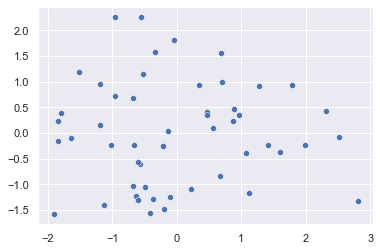

In [155]:
#plotting principal components
sns.scatterplot(x = x_pca_1,y = x_pca_2)

In [156]:
#Find clusters of similar states in the data
from sklearn.cluster import KMeans

D:\Jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


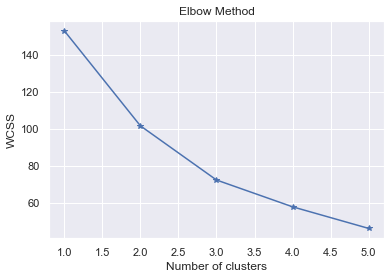

In [157]:
wcss = []
for points in range(1,6):
    kmeans_elbow = KMeans(n_clusters = points)
    kmeans_elbow.fit(x_scaled)
    wcss.append(kmeans_elbow.inertia_)
    
plt.plot(range(1, 6), wcss,marker = '*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

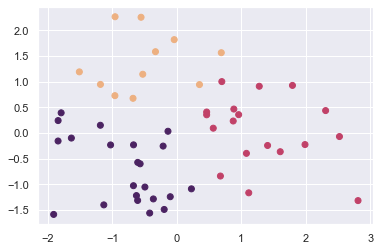

In [158]:
#KMeans to visualize clusters in the PCA scatter plot
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x_scaled)
plt.scatter(x_pca_1,x_pca_2, c = kmeans.labels_, cmap = sns.color_palette("flare", as_cmap=True) )

In [159]:
#Visualize the feature differences between the clusters
road_accidents['Clusters'] = kmeans.labels_

In [160]:
road_accidents.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,Clusters
0,Alabama,18.8,39,30,80,1
1,Alaska,18.1,41,25,94,2
2,Arizona,18.6,35,28,96,2
3,Arkansas,22.4,18,26,95,2
4,California,12.0,35,28,89,2


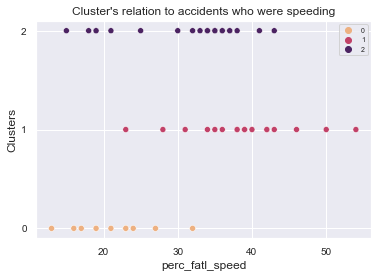

In [161]:
pl = sns.scatterplot(data = road_accidents,x=road_accidents["perc_fatl_speed"], y=road_accidents["Clusters"],hue=road_accidents["Clusters"], palette= "flare")
pl.set_title("Cluster's relation to accidents who were speeding",fontsize = 12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("perc_fatl_speed",fontsize = 12)
plt.ylabel("Clusters",fontsize = 12)
sns.set(font_scale =2)
plt.legend(fontsize=7)
plt.show()

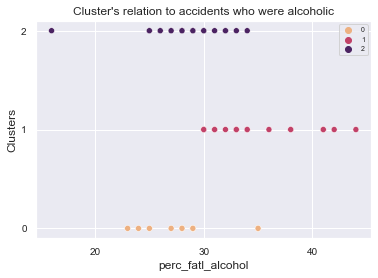

In [162]:
pl = sns.scatterplot(data = road_accidents,x=road_accidents["perc_fatl_alcohol"], y=road_accidents["Clusters"],hue=road_accidents["Clusters"], palette= "flare")
pl.set_title("Cluster's relation to accidents who were alcoholic",fontsize = 12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("perc_fatl_alcohol",fontsize = 12)
plt.ylabel("Clusters",fontsize = 12)
sns.set(font_scale =2)
plt.legend(fontsize=7)
plt.show()

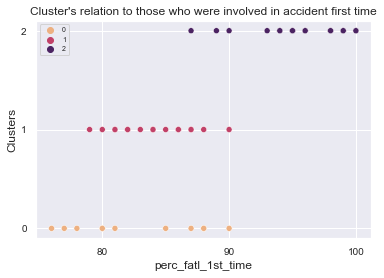

In [163]:
pl = sns.scatterplot(data = road_accidents,x=road_accidents["perc_fatl_1st_time"], y=road_accidents["Clusters"],hue=road_accidents["Clusters"], palette= "flare")
pl.set_title("Cluster's relation to those who were involved in accident first time",fontsize = 12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("perc_fatl_1st_time",fontsize = 12)
plt.ylabel("Clusters",fontsize = 12)
sns.set(font_scale =2)
plt.legend(fontsize=7)
plt.show()

In [166]:
#Compute the number of accidents within each cluster
road_accidents_miles = pd.merge(road_accidents,miles_driven,on = 'state')

In [168]:
road_accidents_miles.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,Clusters,million_miles_annually
0,Alabama,18.8,39,30,80,1,64914
1,Alaska,18.1,41,25,94,2,4593
2,Arizona,18.6,35,28,96,2,59575
3,Arkansas,22.4,18,26,95,2,32953
4,California,12.0,35,28,89,2,320784


In [170]:
road_accidents_miles['acc_million_annually'] = (road_accidents_miles['drvr_fatl_col_bmiles'] * road_accidents_miles['million_miles_annually'])/1000
road_accidents_miles.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,Clusters,million_miles_annually,acc_million_annually
0,Alabama,18.8,39,30,80,1,64914,1220.3832
1,Alaska,18.1,41,25,94,2,4593,83.1333
2,Arizona,18.6,35,28,96,2,59575,1108.0950
3,Arkansas,22.4,18,26,95,2,32953,738.1472
4,California,12.0,35,28,89,2,320784,3849.4080


In [176]:
road_accidents_miles

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,Clusters,million_miles_annually,acc_million_annually
0,Alabama,18.8,39,30,80,1,64914,1220.3832
1,Alaska,18.1,41,25,94,2,4593,83.1333
2,Arizona,18.6,35,28,96,2,59575,1108.0950
3,Arkansas,22.4,18,26,95,2,32953,738.1472
4,California,12.0,35,28,89,2,320784,3849.4080
5,Colorado,13.6,37,28,95,2,46606,633.8416
6,Connecticut,10.8,46,36,82,1,31197,336.9276
7,Delaware,16.2,38,30,99,2,9028,146.2536
8,District of Columbia,5.9,34,27,100,2,3568,21.0512
9,Florida,17.9,21,29,94,2,191855,3434.2045


<AxesSubplot:xlabel='Clusters', ylabel='acc_million_annually'>

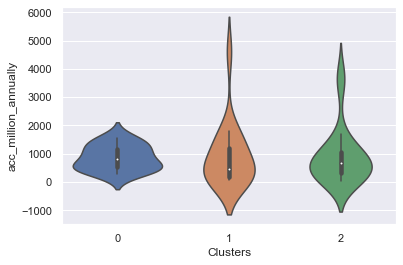

In [179]:
sns.set(font_scale =1)
sns.violinplot(x = "Clusters", y = "acc_million_annually",data = road_accidents_miles)